In [5]:
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/starbucks.csv', index_col='Date', parse_dates=True)

In [7]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [9]:
# Resample the data yearly and aggregate data with the mean
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


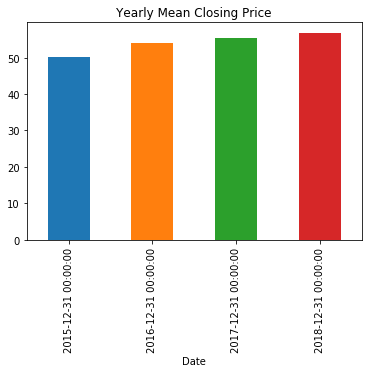

In [10]:
df.Close.resample(rule='A').mean().plot.bar(title='Yearly Mean Closing Price')

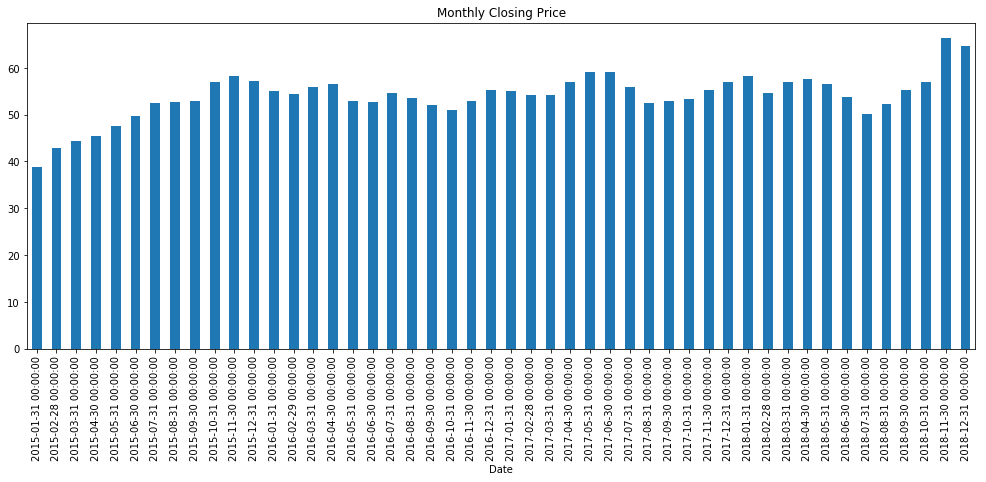

In [17]:
df.Close.resample(rule='M').mean().plot.bar(title='Monthly Closing Price', figsize=(17,6), color='#1f77b4')

### Shifting data

In [18]:
df.shift(1).head() # use -1 if want to shift backward

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [26]:
df.shift(periods=1, freq='M').head() # shift to month-end

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


### Rolling

[Text(0,0.5,'Closing Price (USD)'), Text(0.5,0,'Closing Date')]

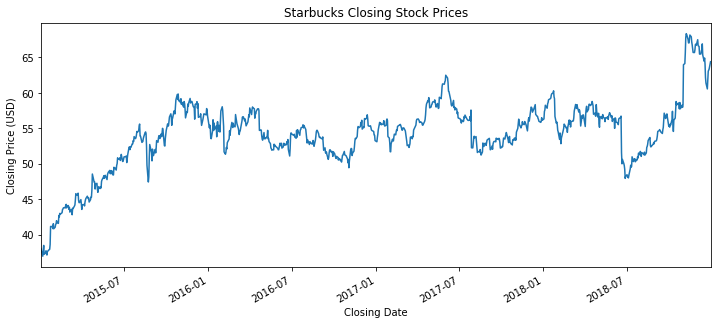

In [38]:
title = 'Starbucks Closing Stock Prices'
ylabel = 'Closing Price (USD)'
xlabel = 'Closing Date'


ax = df['Close'].plot(figsize=(12,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [30]:
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


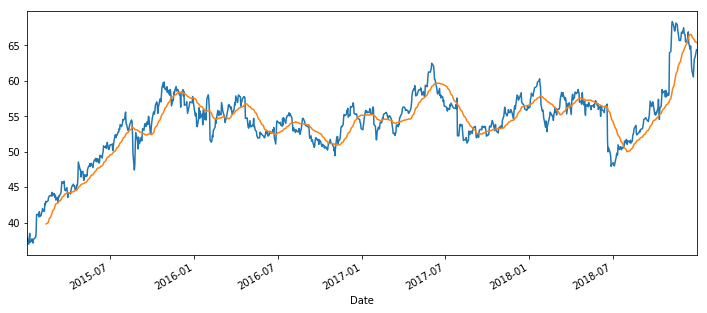

In [32]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x', tight=True)
df.rolling(window=30).mean()['Close'].plot();

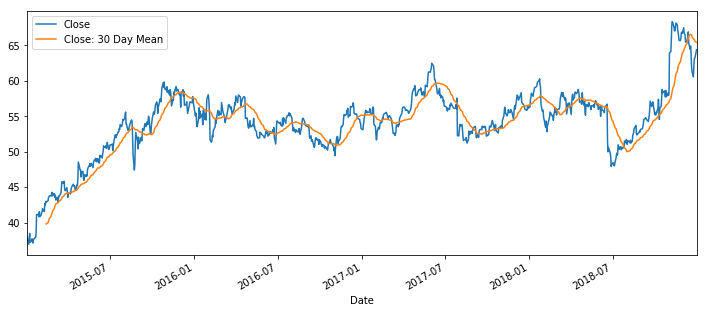

In [33]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x', tight=True)

### Expanding

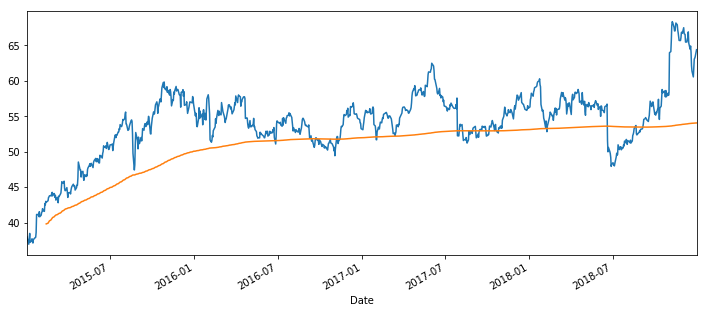

In [36]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5))

### Plotting

In [39]:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

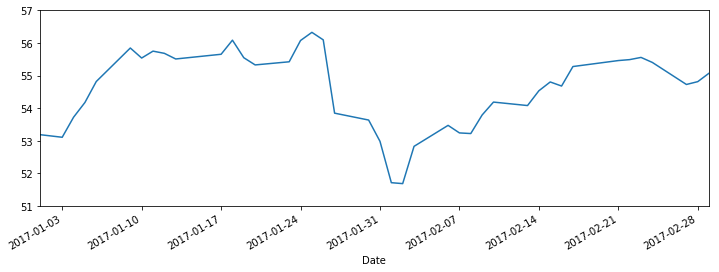

In [42]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'], ylim=[51,57])

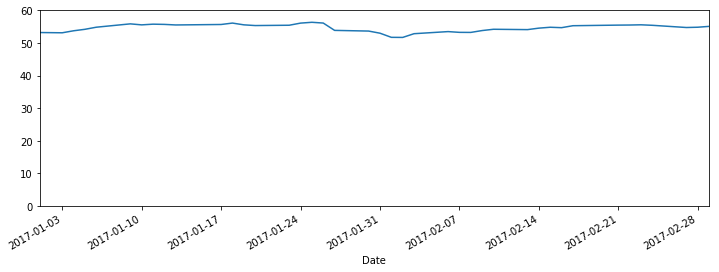

In [43]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'], ylim=[0,60])

In [46]:
from matplotlib import dates

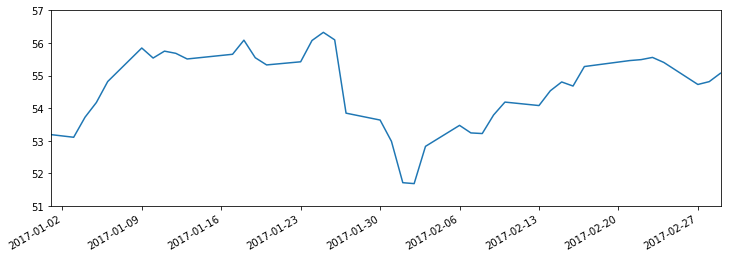

In [49]:
ax = df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'], ylim=[51,57])

ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

In [50]:
from datetime import datetime

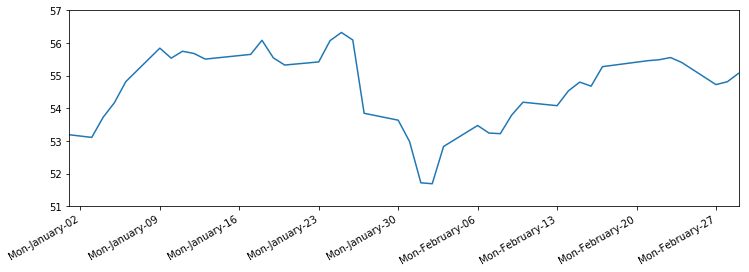

In [51]:
ax = df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'], ylim=[51,57])

ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

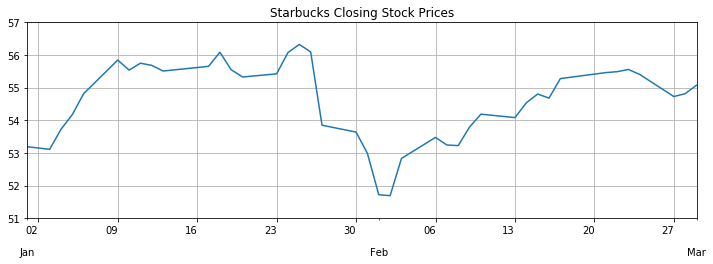

In [53]:
ax = df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'], ylim=[51,57], rot=0, title='Starbucks Closing Stock Prices')

ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

### Study Case UMTMVS dataset

In [56]:
df_um = pd.read_csv('UMTMVS.csv')
df_um.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [57]:
df_um.dtypes

DATE       object
UMTMVS    float64
dtype: object

In [59]:
df_um['DATE'] = pd.to_datetime(df_um['DATE'])

In [60]:
df_um.dtypes

DATE      datetime64[ns]
UMTMVS           float64
dtype: object

In [61]:
df_um.set_index('DATE', inplace=True)
df_um.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


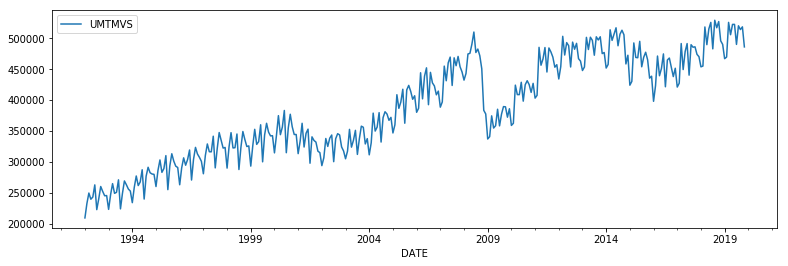

In [63]:
df_um.plot(figsize=(13,4))

In [69]:
df_um.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [79]:
df_um.sort_values(by='UMTMVS', ascending=False).head()

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2019-03-01,525684.0
2018-06-01,525660.0
2019-06-01,522474.0


In [80]:
df_um.resample('Y').mean().head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


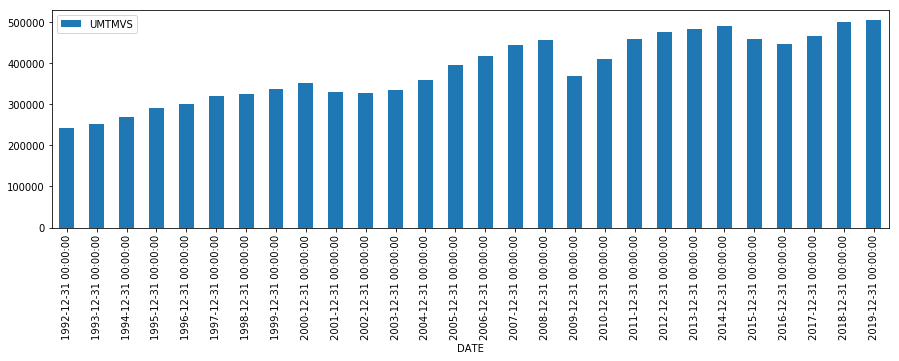

In [78]:
df_um.resample('Y').mean().plot.bar(figsize=(15,4))

In [81]:
yearly_data = df_um.resample('Y').mean()
yearly_data_shifted = yearly_data.shift(1)

In [82]:
change = yearly_data - yearly_data_shifted

In [84]:
change['UMTMVS'].idxmax() 
# biggest increase in mean value from the previous year's mean value

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

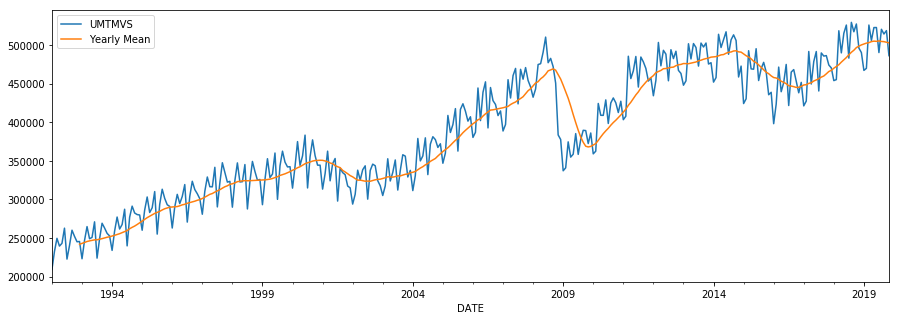

In [85]:
df_um['Yearly Mean'] = df_um['UMTMVS'].rolling(window=12).mean()
df_um[['UMTMVS','Yearly Mean']].plot(figsize=(15,5)).autoscale(axis='x', tight=True)

In [86]:
df2008 = df_um['2008-01-01':'2009-01-01']
df2008.idxmax()

UMTMVS        2008-06-01
Yearly Mean   2008-09-01
dtype: datetime64[ns]

In [87]:
df2008.max()

UMTMVS         510081.000000
Yearly Mean    468961.416667
dtype: float64

In [90]:
df_post_peak = df_um.loc[df2008.idxmax()['UMTMVS']:]

In [92]:
df_post_peak[df_post_peak['UMTMVS']>=df2008.max()['UMTMVS']]

,UMTMVS,Yearly Mean
DATE,,
2008-06-01,510081.0,461993.250000
2014-03-01,513700.0,485847.666667
2014-06-01,516935.0,489181.333333
2014-09-01,512988.0,492120.250000
2018-03-01,518285.0,474351.250000
2018-05-01,515105.0,480757.250000
2018-06-01,525660.0,483611.000000
2018-08-01,529157.0,490453.500000
2018-09-01,516992.0,493075.583333


### Moving Averages (SMA vs EWMA)

In [93]:
airline = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [94]:
airline.dropna(inplace=True)

In [95]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [97]:
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [98]:
airline.head(15)

,Thousands of Passengers,6-month-sma,12-month-sma
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


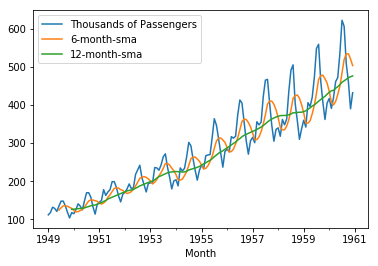

In [99]:
airline.plot();

In [100]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

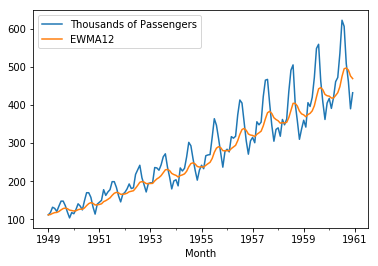

In [101]:
airline[['Thousands of Passengers','EWMA12']].plot();

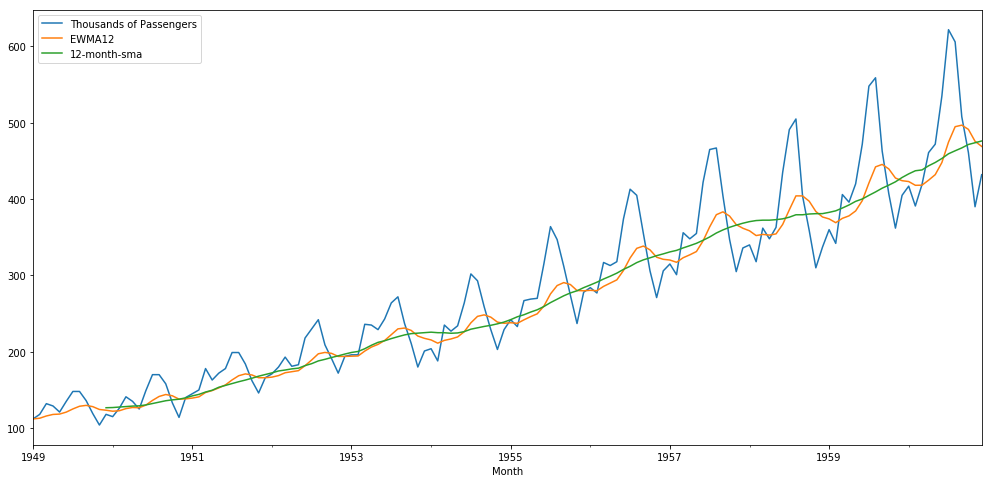

In [104]:
airline[['Thousands of Passengers', 'EWMA12', '12-month-sma']].plot(figsize=(17,8)).autoscale(axis='x', tight=True)

## Forecasting

In [105]:
import pandas as pd
import numpy as np
%matplotlib inline

In [110]:
df = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'

In [111]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [113]:
# Split train and test
train_data = df.iloc[:108]
test_data = df.iloc[108:]

In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [117]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

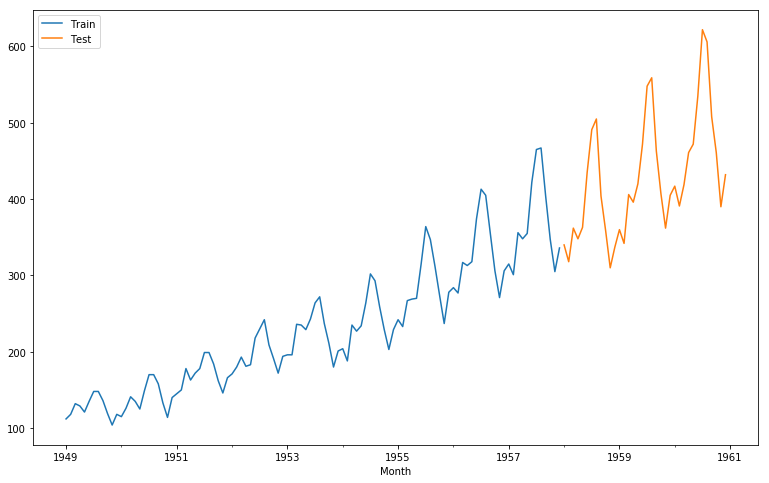

In [120]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(13,8))

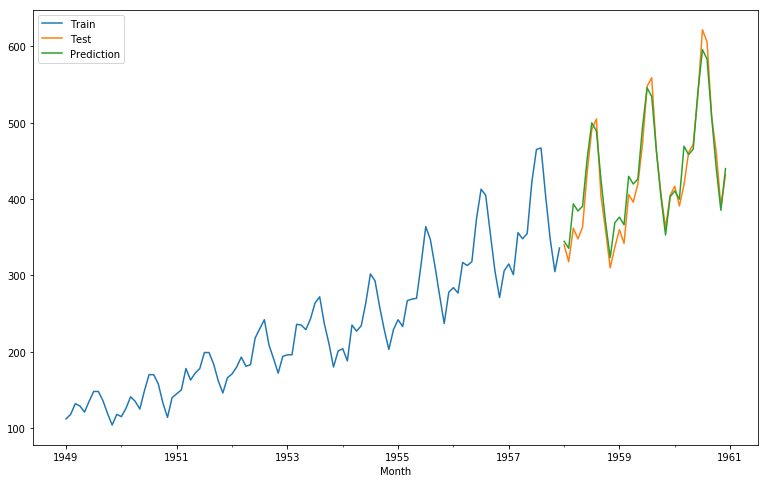

In [121]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(13,8))
test_predictions.plot(legend=True, label='Prediction')

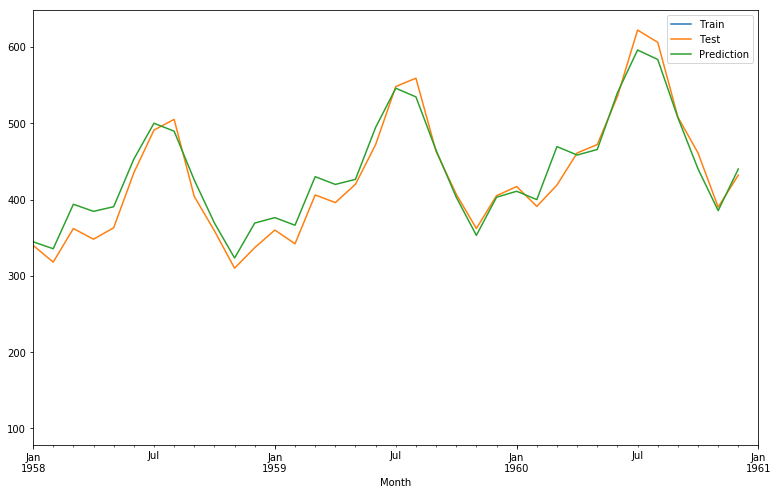

In [122]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(13,8))
test_predictions.plot(legend=True, label='Prediction', xlim=['1958-01-01','1961-01-01'])

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [124]:
mean_absolute_error(test_data, test_predictions)

15.563316620951165

In [126]:
np.sqrt(mean_squared_error(test_data, test_predictions))

19.39147798284415

## Stationarity

In [129]:
# Stationary --> no trend or seasonality
df = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/samples.csv', index_col=0, parse_dates=True)

In [130]:
df.head()

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8


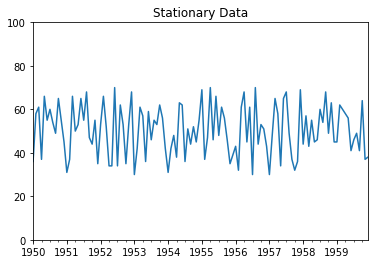

In [134]:
df['a'].plot(ylim=[0,100],title='Stationary Data').autoscale(axis='x', tight=True)

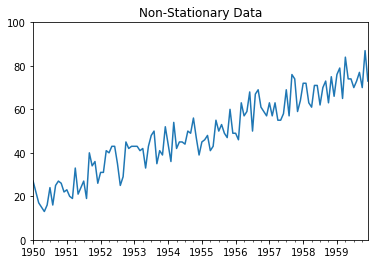

In [135]:
df['b'].plot(ylim=[0,100],title='Non-Stationary Data').autoscale(axis='x', tight=True)

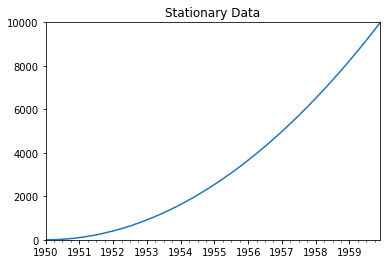

In [138]:
df['c'].plot(ylim=[0,10000],title='Stationary Data').autoscale(axis='x', tight=True)

## Differencing

In [139]:
# First order differencing case 

df['dlb'] = df['b'] - df['b'].shift(1)
df[['b', 'dlb']].head()

,b,dlb
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


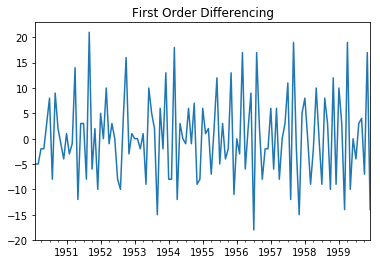

In [140]:
df['dlb'].plot(title='First Order Differencing').autoscale(axis='x', tight=True)

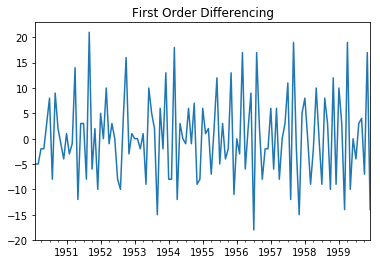

In [141]:
# Using .diff() from dataframe
df['b'].diff().plot(title='First Order Differencing').autoscale(axis='x', tight=True)

In [143]:
df[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [145]:
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12], index=idx, columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [146]:
z['forecast'] = df['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


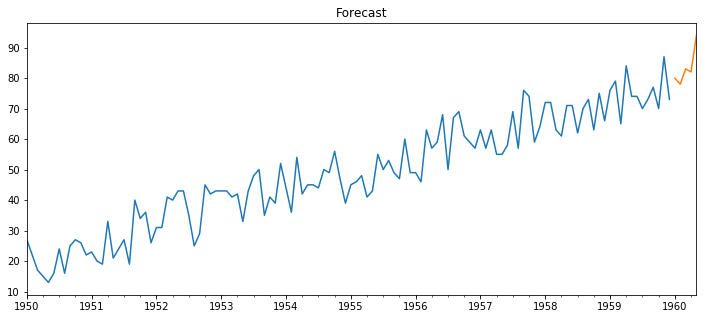

In [150]:
df['b'].plot(figsize=(12,5), title='Forecast').autoscale(axis='x', tight=True)
z['forecast'].plot()

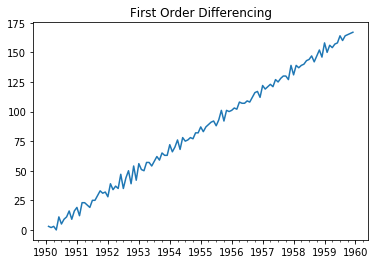

In [153]:
# Second Order Differencing

df['c'].diff().plot(title='First Order Differencing')

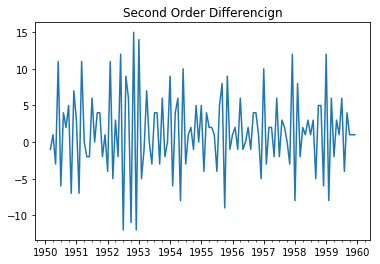

In [155]:
df['dlc'] = df['c'].diff().diff()
df['dlc'].plot(title='Second Order Differencign')

In [160]:
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12], index=idx, columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [163]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df['c'].iloc[-1]-df['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

,Fcast,firstdiff,forecast
1960-01-01,7,174,10174
1960-02-01,-2,172,10346
1960-03-01,5,177,10523
1960-04-01,-1,176,10699
1960-05-01,12,188,10887


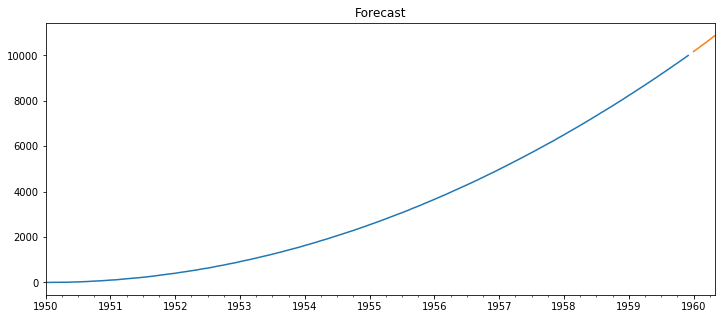

In [164]:
df['c'].plot(figsize=(12,5), title='Forecast').autoscale(axis='x', tight=True)
z['forecast'].plot()

## Autocorrelation Function

In [168]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

# non-stationary dataset
df1 = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

# stationary dataset
df2 = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

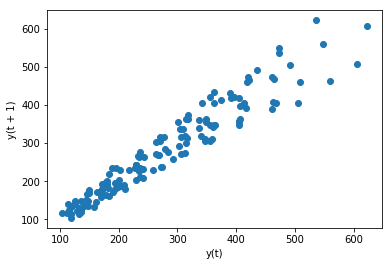

In [169]:
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers'])

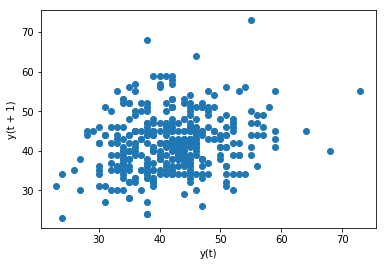

In [170]:
lag_plot(df2['Births'])

In [171]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [172]:
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

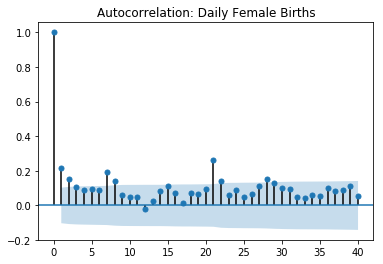

In [174]:
plot_acf(df2, title='Autocorrelation: Daily Female Births', lags=40);

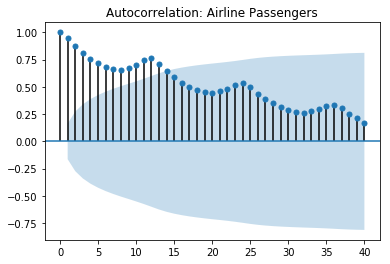

In [176]:
plot_acf(df1, title='Autocorrelation: Airline Passengers', lags=40);

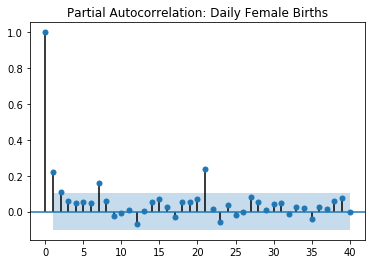

In [178]:
plot_pacf(df2, title='Partial Autocorrelation: Daily Female Births', lags=40);

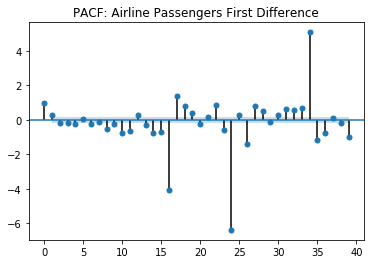

In [184]:
df['dl'] = df1['Thousands of Passengers'].diff()
plot_pacf(df['dl'].dropna(), title='PACF: Airline Passengers First Difference', lags=np.arange(40));

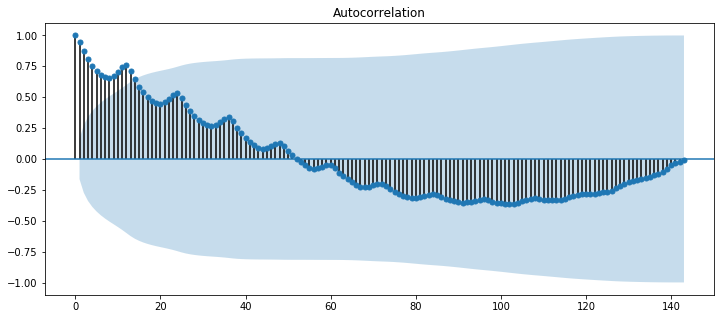

In [186]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df1, ax=ax);

## Autoregressive Model

In [188]:
from statsmodels.tsa.ar_model import AR, ARResults

In [189]:
df = pd.read_csv('./TSA_COURSE_NOTEBOOKS/Data/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [190]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


[Text(0,0.5,'Pop. Est. (thousands)')]

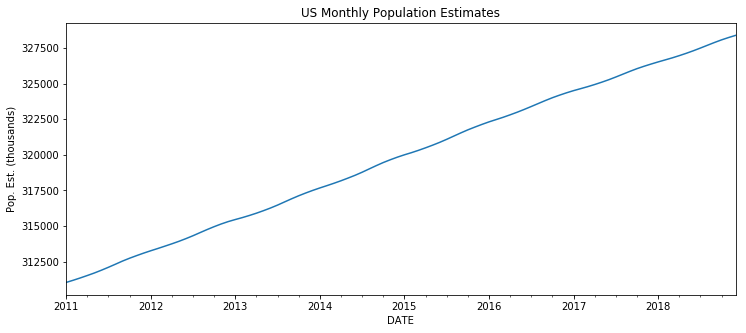

In [192]:
ax = df['PopEst'].plot(figsize=(12, 5), title='US Monthly Population Estimates');
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Pop. Est. (thousands)')

In [193]:
len(df)

96

In [194]:
train = df.iloc[:84]
test = df.iloc[84:]

In [195]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        127.444625
L1.PopEst      0.999600
dtype: float64


/Users/fadhil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [196]:
start = len(train)
end = len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

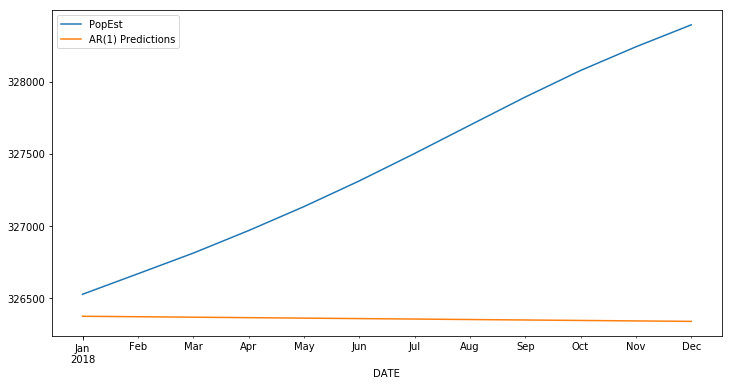

In [197]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [198]:
AR2fit = model.fit(maxlag=2, method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        126.814475
L1.PopEst      1.996610
L2.PopEst     -0.997008
dtype: float64


/Users/fadhil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [199]:
start = len(train)
end = len(train) + len(test) - 1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Prediction')

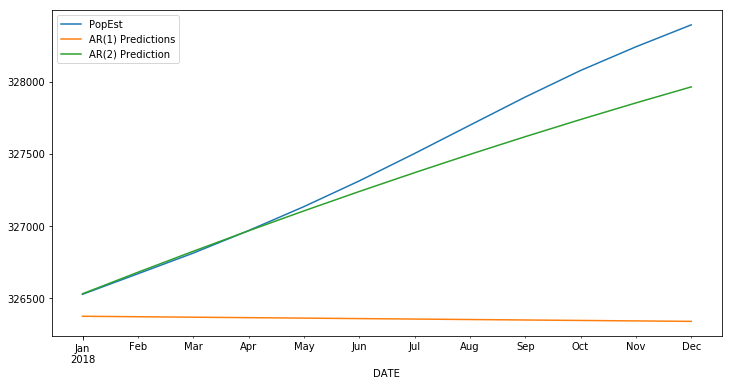

In [202]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [203]:
# AR(p) model where statsmodel chooses the p

ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.093710
L1.PopEst      2.228518
L2.PopEst     -1.949546
L3.PopEst      1.397730
L4.PopEst     -1.131134
L5.PopEst      0.706364
L6.PopEst     -0.766585
L7.PopEst      0.746573
L8.PopEst     -0.118862
L9.PopEst     -0.018659
L10.PopEst    -0.003532
L11.PopEst    -0.091170
dtype: float64


/Users/fadhil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/fadhil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [205]:
predictions11 = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(11) Prediction')

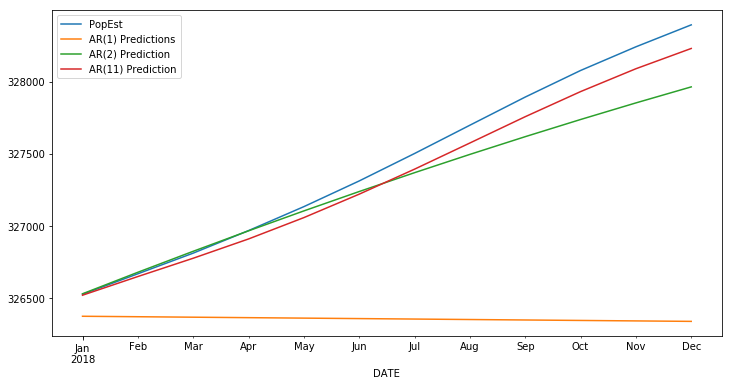

In [206]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [207]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)', 'AR(2)', 'AR(11)']
preds = [predictions1, predictions2, predictions11]

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1542091.881
AR(2) Error: 49257.96581
AR(11) Error: 11312.13508


In [208]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 3.3793
AR(2) AIC: 3.4031
AR(11) AIC: 3.6174


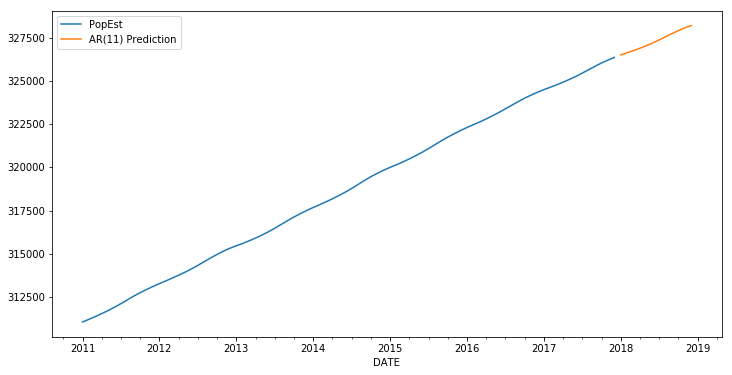

In [211]:
train.plot(legend=True)
predictions11.plot(legend=True, figsize=(12,6))

## Descriptive Statistics and Test

In [213]:
# Load a seasonal dataset
df1 = pd.read_csv('./TSA_COURSE_NOTEBOOKS//Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('./TSA_COURSE_NOTEBOOKS//Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [214]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram

In [215]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [216]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

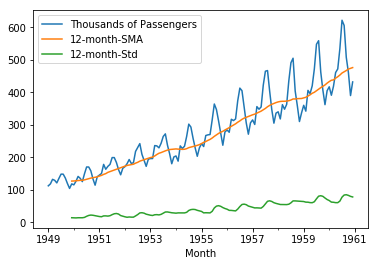

In [217]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

In [218]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060424,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [220]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)
# fail to reject the hypothesis that this is stationary bcs
# it has a very high p-value 0.99

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


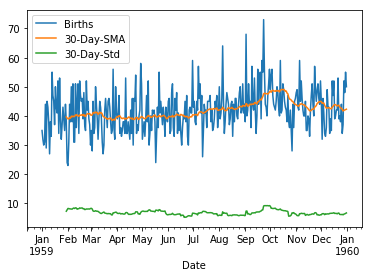

In [221]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [222]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)
# p-value is very low, reject the null hypothesis --> it is stationary

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [223]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

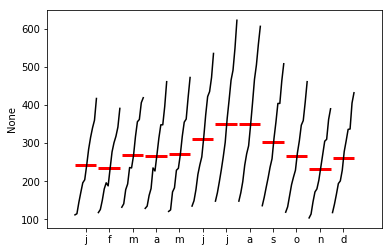

In [225]:
# monthly and quarterly plot

from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df1['Thousands of Passengers']);

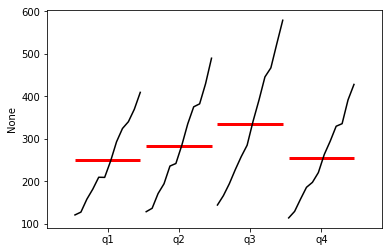

In [226]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);

## Arima Model

In [243]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from pmdarima.arima import auto_arima 

AttributeError: type object 'pmdarima.utils._array.array' has no attribute '__reduce_cython__'